# Tutorial on Finding Time Delay

There are three ways to find Time Delay as follows.
1. Autocorrelation
2. Delayed Mutual Information
3. Reconstruction expansion

Function for these are available in nolitsa package. [Github Link for nolitsa package](https://github.com/manu-mannattil/nolitsa) In this Github repository there are examples of how to use the package.

No need to install nolitsa package as there is some problem with pip install with it. Just copy the nolitsa folder given with it and use this notebook it will work.

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nolitsa import delay  # If my current location is 

In [2]:
# Reading data from data.txt
data = pd.read_csv('data1/data.txt', header = None)
data = np.array(data, dtype = float)
data = np.squeeze(data)
data

array([2.78453, 2.79728, 2.81526, ..., 4.32067, 4.33176, 4.34656])

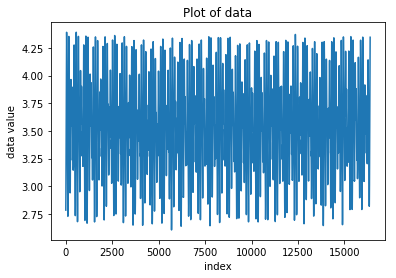

In [34]:
# Plotting the data
plt.figure(1)
plt.plot(data)
plt.ylabel('data value')
plt.xlabel('index')
plt.title('Plot of data')
plt.show()

## Finding Time Delay Using Autocorrelation

Autocorrelation time delay = 21


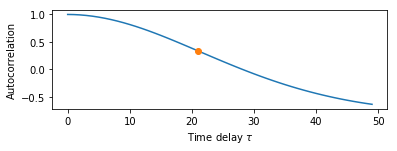

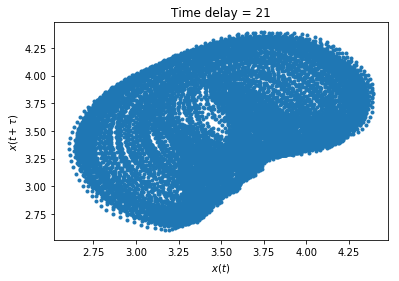

In [41]:
# Time delay using Autocorrelation
x = data[:-1]   # Extracting some part of the data
maxtau = 50     # Maximum timedelay acceptable
lag = np.arange(maxtau)    # For plotting Autocorrelation versus tau
r = delay.acorr(x, maxtau = maxtau)  # Series of autocorrelation for tau from 1 to 50
r_delay = np.argmax(r < 1/np.e)   # Finding the tau for which autocorrelation is just above 1/e

# Printing and plotting the time delay
print(r'Autocorrelation time delay = %d' % r_delay)
plt.figure(1)
plt.subplot(212)
plt.xlabel(r'Time delay $\tau$')
plt.ylabel(r'Autocorrelation')
plt.plot(lag, r, r_delay, r[r_delay], 'o')

# Plotting the phase space considering the system is at least two dimensional
plt.figure(2)
plt.title(r'Time delay = %d' % r_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-r_delay], x[r_delay:], '.')

plt.show()

### Finding Time Delay Using Delayed Mutual Information

Mutual Information time delay = 24


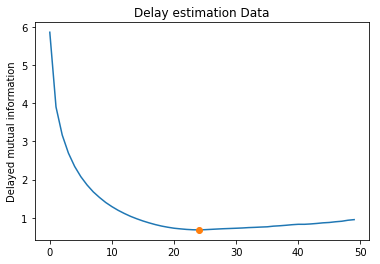

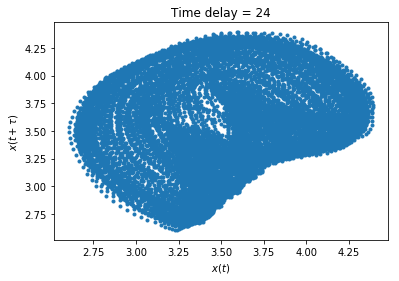

In [39]:
# Time delay using DMI
x = data[:-1]   # Extracting some part of the data
maxtau = 50     # Maximum timedelay acceptable
lag = np.arange(maxtau) # For plotting dmi (delayed mutual information) versus tau
i = delay.dmi(x, maxtau=50)  # Series of dmi for tau from 1 to 50

# Functions
## Function to find all the local minima
def all_minima(x):
  minima_list = []
  for i in range(1,len(x)-1):
    if x[i] < x[i-1] and x[i] < x[i+1]:
      minima_list.append(x[i])

  return minima_list

## Function to calculate the local minima
def first_local_minima(minima_list):
  return minima_list[0]

allm = all_minima(i)   # All minima
i_delay = np.where(i == allm[0])[0][0]  # First minima which is the time delay

# Printing and plotting the time delay
print (r'Mutual Information time delay = %d' %i_delay)
plt.figure(1)
plt.title(r'Delay estimation Data')
plt.ylabel(r'Delayed mutual information')
plt.plot(lag, i, i_delay, i[i_delay], 'o')

# Plotting the phase space considering the system at least to be of two dimension
plt.figure(2)
plt.title(r'Time delay = %d' % i_delay)
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$x(t + \tau)$')
plt.plot(x[:-i_delay], x[i_delay:], '.')

plt.show()